In [223]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import regex as re
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer , TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report ,roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline 


In [224]:
#read in the psychology file
psy= pd.read_csv('psy.csv')
psy.head()

,all_awardings,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,...,thumbnail,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],NaN,NaN,True,NawtAGoodNinja,NaN,NaN,NaN,[],NaN,...,NaN,Updated rules and posting requirements,0,28,https://www.reddit.com/r/askpsychology/comment...,[],NaN,False,NaN,NaN
1,[],NaN,NaN,False,PsyNimo,NaN,NaN,NaN,[],NaN,...,NaN,Is talking to yourself healthy?,0,43,https://www.reddit.com/r/askpsychology/comment...,[],NaN,False,NaN,NaN
2,[],NaN,NaN,False,Apprehensive_Bowl,NaN,NaN,NaN,[],NaN,...,NaN,How do we know that the autism spectrum is at ...,0,6,https://www.reddit.com/r/askpsychology/comment...,[],NaN,False,NaN,NaN
3,[],NaN,NaN,False,EggShellEmotions,NaN,NaN,NaN,[],NaN,...,NaN,Is there a maze or puzzle that you can solve o...,0,8,https://www.reddit.com/r/askpsychology/comment...,[],NaN,False,NaN,NaN
4,[],NaN,NaN,False,kishahatesyou,NaN,NaN,NaN,[],NaN,...,NaN,What are great psychology-related research top...,0,9,https://www.reddit.com/r/askpsychology/comment...,[],NaN,False,NaN,NaN


In [225]:
#Read in the sociology file 
soc = pd.read_csv('soc.csv')
soc.head()

,all_awardings,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,...,thumbnail,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],NaN,NaN,False,Fire_Potato,NaN,NaN,NaN,[],NaN,...,NaN,Help with choosing an appropriate research met...,0,5,https://www.reddit.com/r/sociology/comments/bz...,[],NaN,False,NaN,NaN
1,[],NaN,NaN,False,rjain02,NaN,NaN,NaN,[],NaN,...,NaN,Thinking about Sociology major in Undergrad,0,22,https://www.reddit.com/r/sociology/comments/by...,[],NaN,False,NaN,NaN
2,[],NaN,NaN,False,anmmorenope,NaN,NaN,NaN,[],NaN,...,NaN,A pure hard nature scientist trying to do a so...,0,8,https://www.reddit.com/r/sociology/comments/by...,[],NaN,False,NaN,NaN
3,[],NaN,NaN,False,mutedcoral,NaN,NaN,NaN,[],NaN,...,NaN,Seeking advice on housing research project,0,8,https://www.reddit.com/r/sociology/comments/by...,[],NaN,False,NaN,NaN
4,[],NaN,NaN,False,thebadsociologist,NaN,NaN,NaN,[],NaN,...,NaN,Authorship order and finding a job,0,4,https://www.reddit.com/r/sociology/comments/by...,[],NaN,False,NaN,NaN


In [226]:
# For the purposes of binary classification we dont require all of the author's information
psy.columns


Index(['all_awardings', 'approved_at_utc', 'approved_by', 'archived', 'author',
       'author_cakeday', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'banned_at_utc', 'banned_by', 'can_gild',
       'can_mod_post', 'category', 'clicked', 'content_categories',
       'contest_mode', 'created', 'created_utc', 'distinguished', 'domain',
       'downs', 'edited', 'gilded', 'gildings', 'hidden', 'hide_score', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'likes', 'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'm

In [227]:
# For our classification, we only require the selftext and the subreddit section 
psych = psy[['selftext','subreddit']]
psych.shape

(1001, 2)

In [228]:
# For our classification, we only require the selftext and the subreddit section 
soci = soc[['selftext','subreddit']]
soci.shape

(988, 2)

In [229]:
#Dropping the rows that has null values for both the dataframes
psych = psych.dropna()
soci = soci.dropna()

In [230]:
# To check the shape of the remaining rows in psych df
psych.shape

(825, 2)

In [231]:
# To check the shape of the remaining rows in soci df
soci.shape

(678, 2)

In [232]:
#Add both the psych and soci dataframes together to form a new dataframe
frames = [psych,soci]
combi = pd.concat(frames)

In [233]:
#Shape of the new df
combi.shape

(1503, 2)

In [234]:
#Add more words in the stopwords
stop_words = stopwords.words('english')
additional_stop_words = ['r/askpsychology', 'psychology', 'sociology' , 'psych' , 'soci', 'r/sociology' , 'psy', 'soc' , 'raskpsychology', 'rsociology'] 
stop_words.extend(additional_stop_words)

In [235]:
#Creating a funtion called remove noise to clen the self_text
def remove_noise(input_text):
    words = input_text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words ] 
    noise_free_text = " ".join(noise_free_words) 
    clean1_text = re.sub(r'[^\w\s]' ,'' , noise_free_text)
    clean2_text = re.sub( r'[\n]'  ,'' , clean1_text)
    clean3_text =  re.sub(r'[0-9]+' , '' , clean2_text)
    
    return clean3_text

In [236]:
#Cleaning the data
combi['selftext'] = [remove_noise(i) for i in combi['selftext']]



In [237]:
#Observing the clean data
combi['selftext'].head(n = 10)

0     hello again raskpsychology promised updated ru...
1      heard healthy third person conversation yourself
2     mean extreme cases im talking people distinct ...
3     need lock car keys behind something thats impo...
4     yall tell search google want clarify already b...
5     way died matter ie would suicide different eff...
6     know difference say ssri snri whats difference...
7     like title says spurts clean time mixed bender...
9               especially remember experiencing solely
10    hi im pretty uninformed general freud im entir...
Name: selftext, dtype: object

In [238]:
#Lemmatizing the selftext
lemmatizer = WordNetLemmatizer()


def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in word_tokenize(text)]

combi['selftext'] = combi['selftext'].apply(lemmatize_text)

In [246]:
#Making the selftext type to string
combi['selftext'] = combi['selftext'].astype('str')

In [247]:
#Train-Test split the data
X = combi['selftext']
y = combi['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                   stratify = y)


In [248]:
y_train.head(n= 10)

191    askpsychology
169    askpsychology
932    askpsychology
825    askpsychology
826        sociology
877        sociology
906        sociology
544        sociology
908        sociology
230        sociology
Name: subreddit, dtype: object

In [250]:
X_train.head(n= 10)

191    ['wondering', 'general', 'concensus', 'whether...
169    ['podcast', 'criminal', 'the', 'choir', 'man',...
932    ['im', 'wondering', 'cause', 'people', 'always...
825    ['im', 'kind', 'referring', 'specifically', 'i...
826    ['im', 'currently', 'writing', 'thesis', 'lang...
877    ['im', 'project', 'u', 'census', 'ive', 'diggi...
906    ['writing', 'first', 'essay', 'year', 'started...
544    ['wondering', 'interesting', 'documentary', 'w...
908    ['hi', 'everyone', 'brief', 'introduction', 'b...
230    ['finished', 'espingandersons', 'famous', 'wor...
Name: selftext, dtype: object

In [249]:
#Baseline Score to check accuracy
y.value_counts(normalize=True)

askpsychology    0.548902
sociology        0.451098
Name: subreddit, dtype: float64

In [281]:
#Using pipelines ,using tvec and MNB

pipe = Pipeline([
    #('cvec', CountVectorizer()),
    ('tvec', TfidfVectorizer()),
    ('cls', MultinomialNB()),
    #('lr' , LogisticRegression())
    
])


In [282]:
cross_val_score(pipe, X_train, y_train, cv=3)

array([0.84880637, 0.808     , 0.89333333])

In [283]:
cross_val_score(pipe, X_train, y_train, cv=3).mean() 

0.8500465664603597

In [284]:
#Using tvec and MNB
pipe_params = {
     'tvec__max_features': [2500, 3000, 3500],
    'tvec__min_df': [0.01, 0.03, 0.05],
    'tvec__max_df': [0.85,.9, .95],
    'tvec__ngram_range': [(1,1), (1,2),(1,3)],
    'tvec__norm': ['l1', 'l2']
}
gs_1 = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs_1.fit(X_train, y_train)
print(gs.best_score_)
gs_1.best_params_

0.8074534161490683


{'tvec__max_df': 0.85,
 'tvec__max_features': 2500,
 'tvec__min_df': 0.01,
 'tvec__ngram_range': (1, 2),
 'tvec__norm': 'l2'}

In [285]:
#Using tvec and MNB
gs_1.score(X_train, y_train)

0.8881987577639752

In [286]:
#Using tvec and MNB
gs_1.score(X_test, y_test)

0.8218085106382979

In [287]:
#Using pipelines, Using tvec and Lr

pipe = Pipeline([
    #('cvec', CountVectorizer()),
    ('tvec', TfidfVectorizer()),
    #('cls', MultinomialNB()),
    ('lr' , LogisticRegression())
    
])


In [288]:
cross_val_score(pipe, X_train, y_train, cv=3)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.82493369, 0.8       , 0.85333333])

In [289]:
cross_val_score(pipe, X_train, y_train, cv=3).mean() 

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.826089006778662

In [290]:
#Using tvec and lr
pipe_params = {
    'tvec__max_features': [2500, 3000, 3500],
    'tvec__min_df': [0.01, 0.03, 0.05],
    'tvec__max_df': [0.85,.9, .95],
    'tvec__ngram_range': [(1,1), (1,2),(1,3)],
    'tvec__norm': ['l1', 'l2']
}
gs_2 = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs_2.fit(X_train, y_train)
print(gs.best_score_)
gs_2.best_params_

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8074534161490683


{'tvec__max_df': 0.85,
 'tvec__max_features': 2500,
 'tvec__min_df': 0.01,
 'tvec__ngram_range': (1, 1),
 'tvec__norm': 'l2'}

In [291]:
#Using tvec and lr
gs_2.score(X_train, y_train)

0.9165927240461402

In [292]:
#Using tvec and lr
gs_2.score(X_test, y_test)

0.8430851063829787

In [293]:
#Using pipelines, UsingCvec & MNB

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    #('tvec', TfidfVectorizer()),
    ('cls', MultinomialNB()),
    #('lr' , LogisticRegression())
    
])


In [294]:
cross_val_score(pipe, X_train, y_train, cv=3)

array([0.83819629, 0.856     , 0.84266667])

In [295]:
cross_val_score(pipe, X_train, y_train, cv=3).mean() 

0.8456209843796051

In [296]:
#Cvec & MNB
pipe_params = {
     'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [0.01, 0.03, 0.05],
    'cvec__max_df': [0.85,.9, .95],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)]
}
gs_3 = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs_3.fit(X_train, y_train)
print(gs.best_score_)
gs_3.best_params_

0.8074534161490683


{'cvec__max_df': 0.85,
 'cvec__max_features': 2500,
 'cvec__min_df': 0.01,
 'cvec__ngram_range': (1, 1)}

In [297]:
# Using Cvec & MNB
gs_3.score(X_train, y_train)

0.8775510204081632

In [298]:
# Using Cvec & MNB
gs_3.score(X_test, y_test)

0.8297872340425532

In [317]:
#Using pipelines, UsingCvec & lr

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    #('tvec', TfidfVectorizer()),
    #('cls', MultinomialNB()),
    ('lr' , LogisticRegression())
    
])


In [318]:
cross_val_score(pipe, X_train, y_train, cv=3)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.83819629, 0.78933333, 0.832     ])

In [319]:
cross_val_score(pipe, X_train, y_train, cv=3).mean() 

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8198432066018273

In [320]:
#Cvec & lr
pipe_params = {
     'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [0.01, 0.03, 0.05],
    'cvec__max_df': [0.85,.9, .95],
    'cvec__ngram_range': [(1,1), (1,2),(1,3)]
}
gs_4 = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs_4.fit(X_train, y_train)
print(gs.best_score_)
gs_4.best_params_

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8074534161490683


{'cvec__max_df': 0.85,
 'cvec__max_features': 2500,
 'cvec__min_df': 0.01,
 'cvec__ngram_range': (1, 2)}

In [321]:
# Using Cvec & MNB
gs_4.score(X_train, y_train)
#Overfitting model

0.9849157054125999

In [322]:
# Using Cvec & MNB
gs_4.score(X_test, y_test)

0.8537234042553191

In [307]:
predicted = gs_1.predict(X_test)
print (classification_report(y_test, predicted))

               precision    recall  f1-score   support

askpsychology       0.83      0.85      0.84       206
    sociology       0.81      0.79      0.80       170

    micro avg       0.82      0.82      0.82       376
    macro avg       0.82      0.82      0.82       376
 weighted avg       0.82      0.82      0.82       376



In [308]:
predicted = gs_3.predict(X_test)
print (classification_report(y_test, predicted))

               precision    recall  f1-score   support

askpsychology       0.89      0.78      0.83       206
    sociology       0.77      0.89      0.83       170

    micro avg       0.83      0.83      0.83       376
    macro avg       0.83      0.83      0.83       376
 weighted avg       0.84      0.83      0.83       376



In [ ]:
#We will be using gs1 as there is a higher precision rate for both the categories
#gs_1 uses tfif vectorizer and Multinomial Naive Bayes

In [300]:
combi[combi['subreddit'] == 'sociology'].selftext.str.split(expand=True).stack().value_counts().head(20)


'im',          566
'would',       377
'social',      346
'like',        306
'research',    285
'people',      247
'know',        211
'work',        208
'one',         174
'ive',         172
'get',         169
'year',        164
'also',        154
'help',        152
'question',    151
'could',       149
'really',      147
'want',        145
'time',        140
'anyone',      140
dtype: int64

In [301]:
combi[combi['subreddit'] == 'askpsychology'].selftext.str.split(expand=True).stack().value_counts().head(20)

'like',         455
'people',       417
'im',           416
'would',        375
'know',         283
'time',         240
'one',          231
'it',           222
'ampxb',        213
'could',        201
'thing',        190
'feel',         179
'someone',      176
'something',    176
'think',        174
'get',          168
'question',     164
'also',         162
'person',       157
'make',         152
dtype: int64

In [302]:
##Roc Curve 

def plot_roc(y, probs, name_title,threshmarkers=None):
    fpr, tpr, thresh = roc_curve(y, probs)

    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, lw=2)
   
    plt.title(name_title)
    plt.xlabel("False Positive Rate\n(1 - Specificity)")
    plt.ylabel("True Positive Rate\n(Sensitivity)")
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xticks(np.linspace(0, 1, 21), rotation=45)
    plt.yticks(np.linspace(0, 1, 21))
    plt.show()

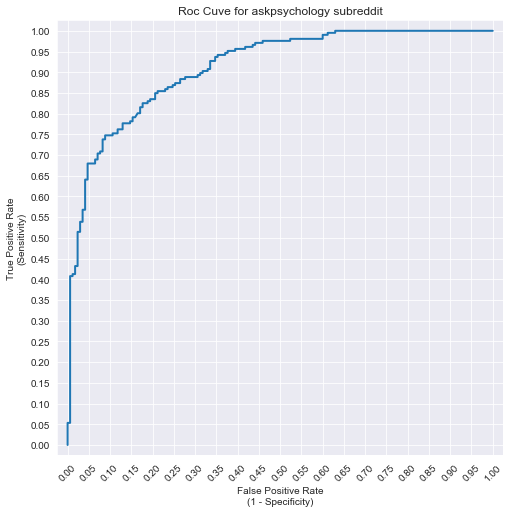

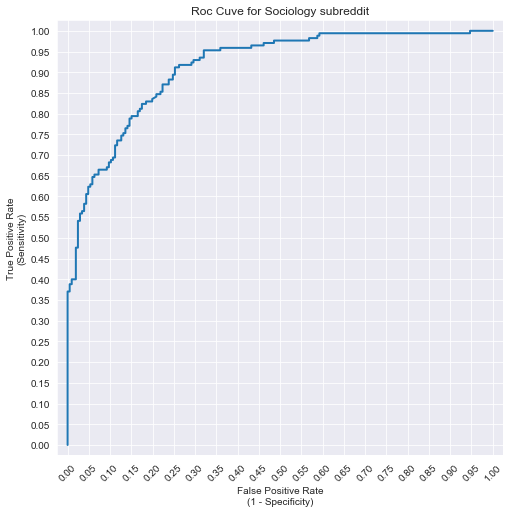

In [309]:
predicted_proba = gs_1.predict_proba(X_test)
plot_roc(y_test.apply(lambda x: x == "askpsychology"), predicted_proba[:, list(gs_3.classes_).index("askpsychology")],'Roc Cuve for askpsychology subreddit')
plot_roc(y_test.apply(lambda x: x == "sociology"), predicted_proba[:, list(gs_3.classes_).index("sociology")], 'Roc Cuve for Sociology subreddit')



In [316]:
predicted = gs_1.predict(X_test)

# Incorrectly classified
incorrect_preds = X_test[(predicted != y_test)]


incorrect_preds.shape

(67,)

## Conclusion: 

After the text was cleaned and tokenized, we used the pipelines and GridCV to find out which vectorizer and parameters gave the most accurate subreddit predictions. We observed overfitting for the countvectorizer and logistic regression model, while the other models worked equally well. Therefore, the models were evaluated based on their precision scores. The evaluations concluded that the tfidf vectorizer together with the Multinomial Naive Bayes gave the highest precision values.Out of the 374 data points in the test dataset only 67 of the subreddit were classified wrongly. Therefore, we suggest that the tfidf and the Multinomial NB is a good predictor for classifying the subreddit categories. We have to take note that the current model only has two different subreddits to classify from. Therefore, this same model might not be useful in predicting when there are more than 2 subreddit categories.
